<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: kriging standard 2D </font>
</div>

- **Fecha**: 2023/03/28
        
- **Objetivos**: 2D standard Kriging 
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 75
rcParams['lines.markersize']=10
rcParams['image.cmap']='hot'
rcParams['figure.figsize']=(8,8)

%matplotlib widget


# Theoretical variogram 



In [4]:
import ipywidgets as widgets

In [5]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import theoretical
#from phyton_kriging.variogram_2D import theoretical
from phyton_kriging.standard_2D import kriging2D
from phyton_kriging.convolution_2D import Convolution_2D

## Variograma 1D

In [6]:
h = np.linspace(0, 10, 1000)

name = gauss

h: min - 0.0, max - 10.0
variogram: min - 0.0025000000000000005, max - 1.0005695458637722
parameters = {'sc': 0.05, 'A': 1, 'lc': 4, 'power': None}



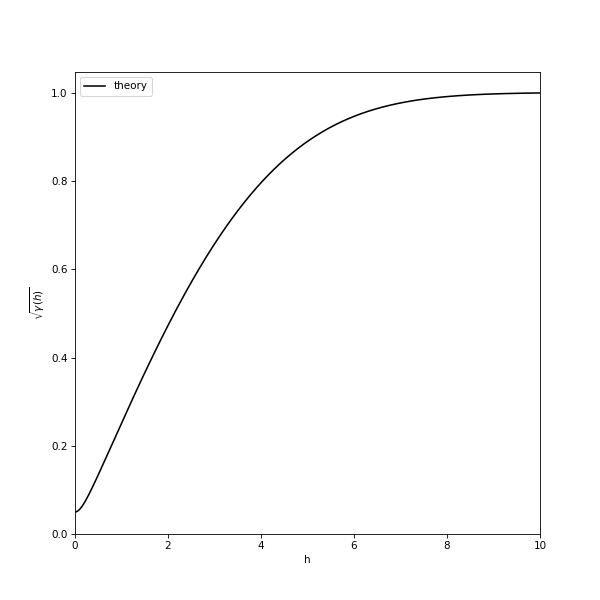

In [49]:
sc = 0.05
I0 = .00001

# var_theo = theoretical(h=h, make_2D=False)
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=4)
var_theo.draw()
print(var_theo)

In [50]:
def f_signal(x, y, sc=0, I0=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        y (np.array): y_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    z = np.exp(-(x**2+y**2)/(2*5**2))
    z = x+y
    z = np.sin(2 * np.pi * x / 10) * np.sin(2 * np.pi * y / 10) + x/10
    z = z + sc * np.random.randn(num_sensors)
    z = z + 2 * I0 * (np.random.rand(num_sensors) - 0.5)

    return z

In [51]:
num_x = num_y = 9
num_sensors = num_x * num_y

sensors = np.zeros((num_sensors, 4), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
y = -10 + 20 * np.random.rand(num_sensors)

x = np.linspace(-10, 10, num_x)
y = np.linspace(-10, 10, num_y)

X,Y=np.meshgrid(x,y)
x = X.flatten()
y= Y.flatten()


sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = f_signal(x,y,sc,I0)
sensors[:, 3] = sc * np.ones_like(x)

sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)


In [54]:
num_sampling = 61**2
num_x = num_y = int(np.sqrt(num_sampling))
x_sampling = np.linspace(-10, 10, num_x)
y_sampling = np.linspace(-10, 10, num_y)
sampling2D=(x_sampling, y_sampling)

X_sampling, Y_sampling = np.meshgrid(x_sampling,y_sampling)
z_ideal_sampling = f_signal(X_sampling, Y_sampling, 0, 0)
Sampling2D = (X_sampling, Y_sampling)

In [55]:
krig1 = kriging2D(sensors=sensors, variogram=var_theo, sampling=sampling2D)
krig1.ideal = z_ideal_sampling

In [56]:
krig1.standard()


61 61


## Drawings

/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


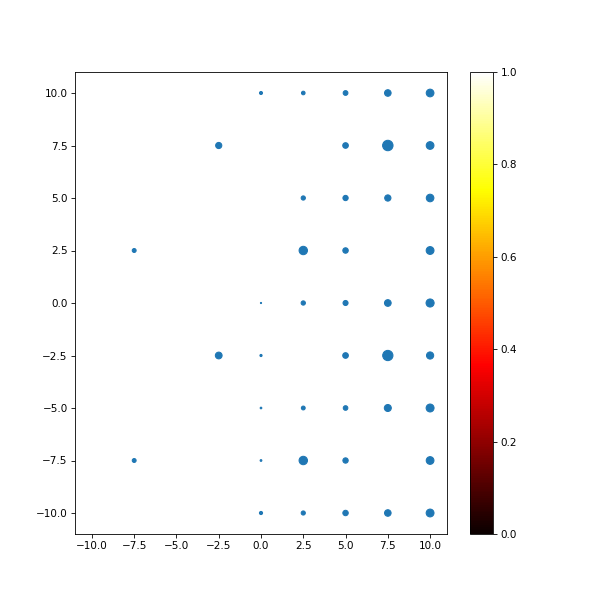

In [57]:
krig1.draw('data')

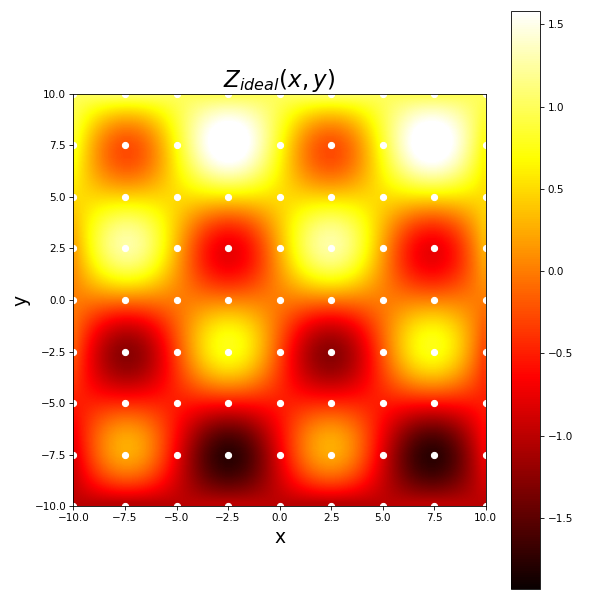

In [58]:
krig1.draw('ideal')

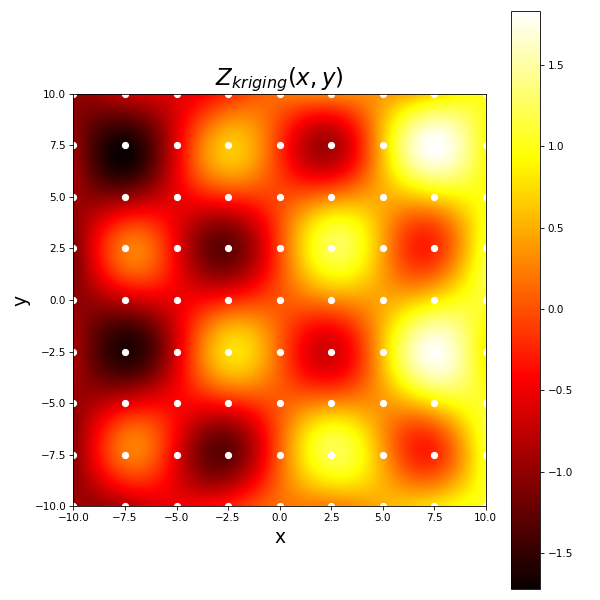

In [59]:
krig1.draw('kriging')

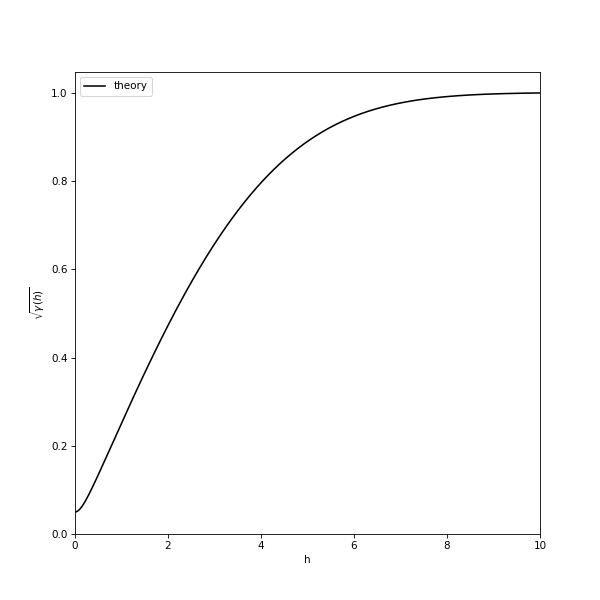

In [60]:
krig1.draw('variogram')

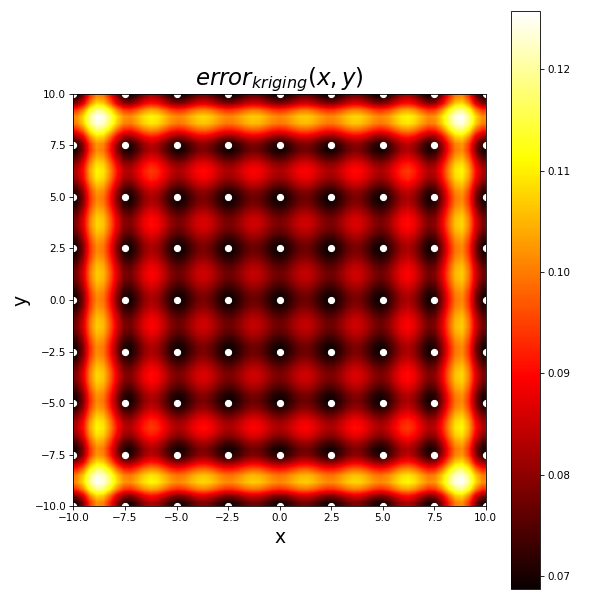

In [61]:
krig1.draw('error')


In [62]:
print(krig1.error.min(), krig1.error.max())
print(krig1.error.mean(), krig1.error.std())


0.06873958053983525 0.1257203774987327
0.0847220317830696 0.011106537431973817


interactive(children=(IntSlider(value=40, description='i', max=80), Output()), _dom_classes=('widget-interact'…

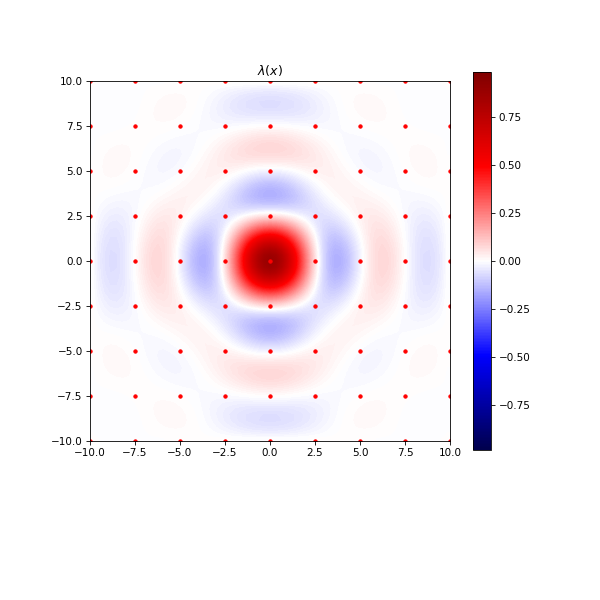

In [63]:
%matplotlib widget
krig1.draw('lambdas')

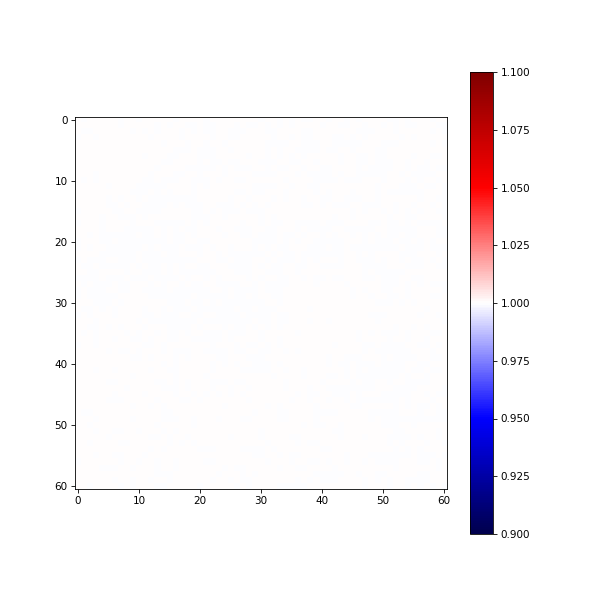

In [64]:
plt.figure()
plt.imshow(krig1.lambdas.sum(axis=2), cmap='seismic')
plt.colorbar()
plt.clim(0.9, 1.1)

## Convolution

In [65]:
krig2 = Convolution_2D(sensors=sensors,
                       variogram=var_theo,
                       sampling=sampling2D,
                       y_ideal=z_ideal_sampling)


61 61


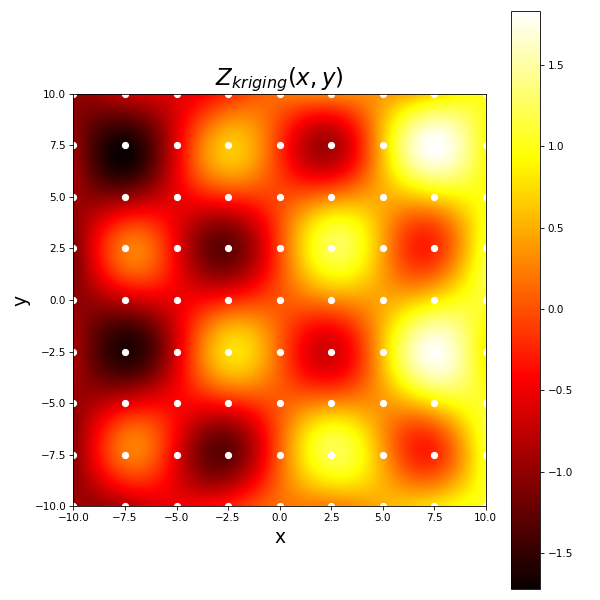

In [66]:
krig2.draw('kriging', cmap='hot')

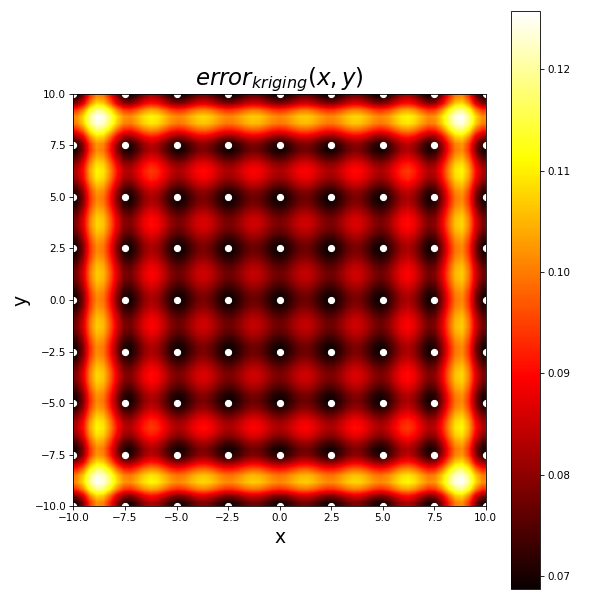

In [67]:
krig2.draw('error_kriging')

interactive(children=(IntSlider(value=40, description='i', max=80), Output()), _dom_classes=('widget-interact'…

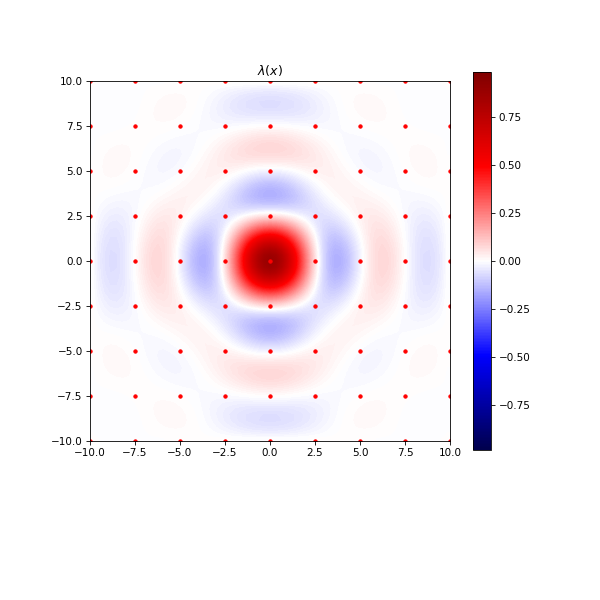

In [68]:
%matplotlib widget
krig2.draw('lambdas')

In [69]:
krig2.compute_DM()
krig2.normalize_DM()
krig2.compute_NEQ()
krig2.center_lambdas()
krig2.get('estimation_convolution')

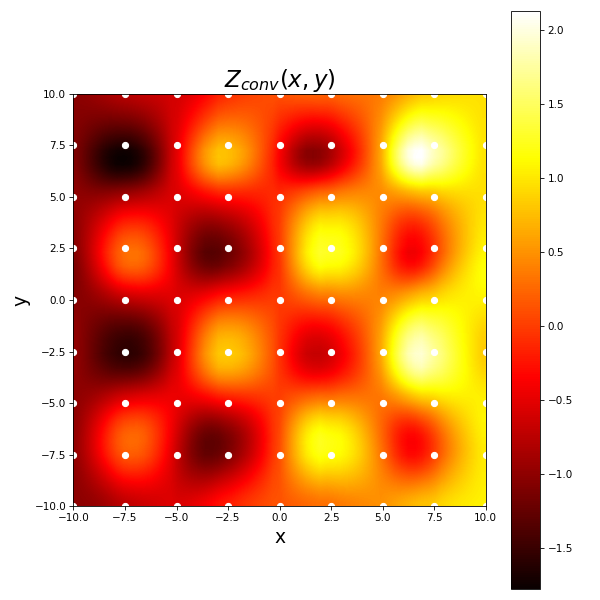

In [70]:
krig2.draw('convolution')

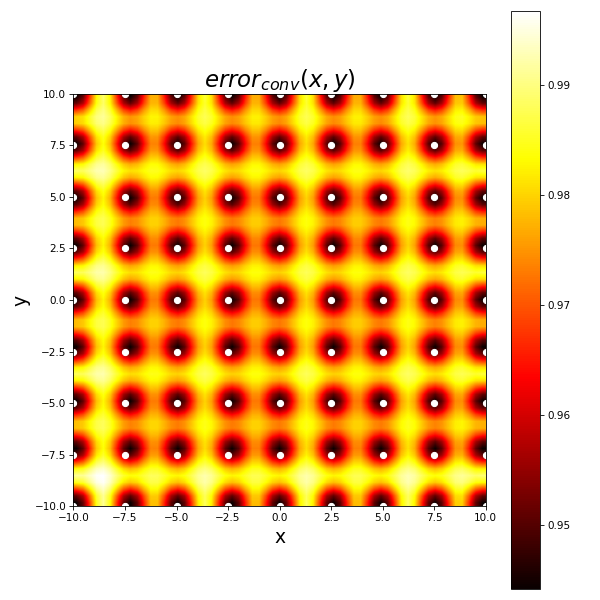

In [71]:
krig2.draw('error_convolution')


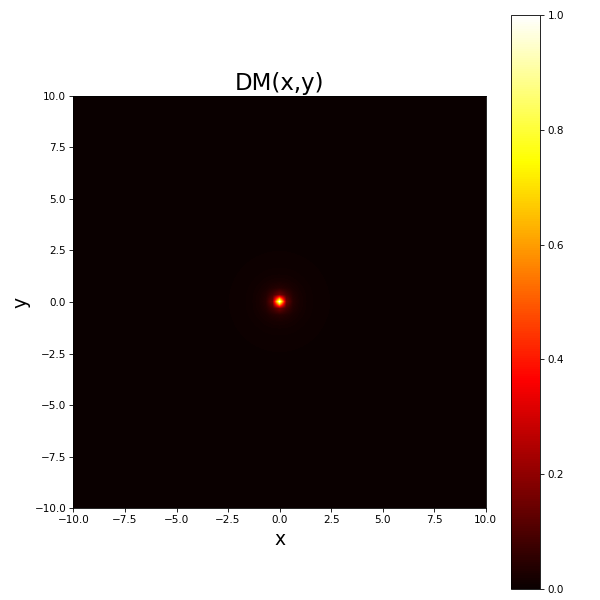

In [72]:
krig2.draw('DM')

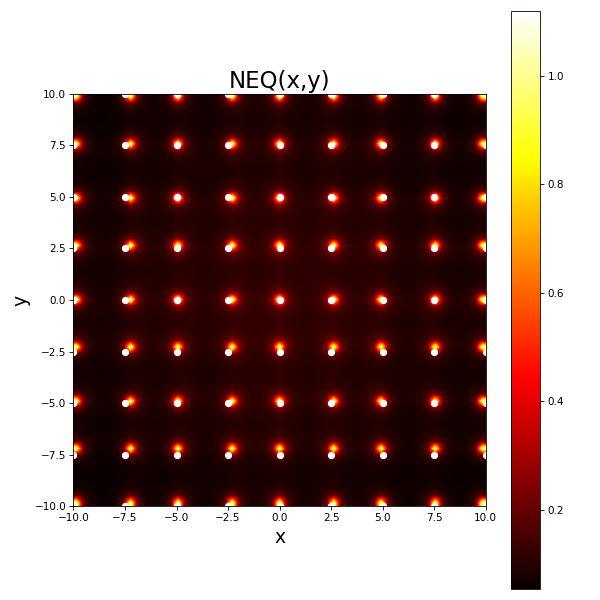

In [73]:
krig2.draw('NEQ')

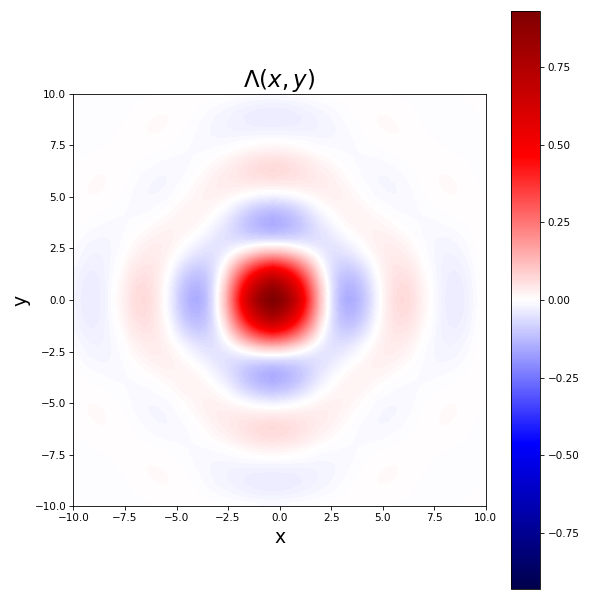

In [74]:
krig2.draw('Lambda')

0.9842204967100746


interactive(children=(IntSlider(value=40, description='i', max=80), Output()), _dom_classes=('widget-interact'…

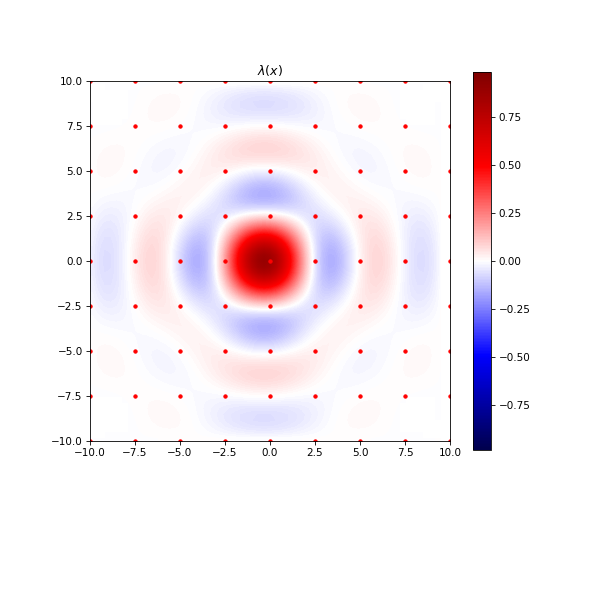

In [75]:
%matplotlib widget
krig2.draw('lambdas_centered')